svm

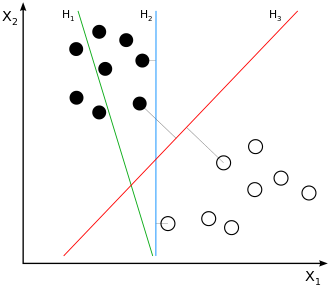

# <a id='1'>1. Load libraries and read the data</a> 

## <a id='1.1'>1.1. Load libraries</a> 

Loading the libraries

In [1]:
import numpy as np # linear algebra
from collections import Counter
from matplotlib.colors import ListedColormap
import pandas as pd # data processing, CSV file I/O

# Data processing and modeling
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 

from sklearn.metrics import accuracy_score


from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier,test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'v', '^', 'o')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='',
                    alpha=1.0, linewidth=1, marker='v',
                    s=55, label='test set')

## <a id='1.2'>1.2. Read data</a> 

Loading dataset with pandas (pd)

In [2]:
data = pd.read_csv('diabetes.csv')

## <a id='2'>2. Data Preprocessing</a> 

## <a id='2.1'>2.1. Data Preprocessing</a> 

In [ ]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
data.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

find the median for filling null values

In [3]:
## As seen earlier there is no null value. However on close inspection we find that null values are filled with '0'

data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].replace(0,np.NaN)    

In [4]:
## Checking the new null values found.
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [5]:
## to find the median for filling null values

def find_median(var):
    temp = data[data[var].notnull()]
    temp = data[[var,'Outcome']].groupby('Outcome')[[var]].median().reset_index()
    return temp

In [6]:
# Now we will be filling these values instead of null values
print(find_median('Insulin'))

data.loc[(data['Outcome'] == 0) & (data['Insulin'].isnull()), 'Insulin'] = 102.5
data.loc[(data['Outcome'] == 1) & (data['Insulin'].isnull()), 'Insulin'] = 169.5
print(find_median('SkinThickness'))

data.loc[(data['Outcome'] == 0) & (data['SkinThickness'].isnull()), 'SkinThickness'] = 27.0
data.loc[(data['Outcome'] == 1) & (data['SkinThickness'].isnull()), 'SkinThickness'] = 32.0

print(find_median('BloodPressure'))
data.loc[(data['Outcome'] == 0) & (data['BloodPressure'].isnull()), 'BloodPressure'] = 70.0
data.loc[(data['Outcome'] == 1) & (data['BloodPressure'].isnull()), 'BloodPressure'] = 74.5

print(find_median('BMI'))
data.loc[(data['Outcome'] == 0) & (data['BMI'].isnull()), 'BMI'] = 30.1
data.loc[(data['Outcome'] == 1) & (data['BMI'].isnull()), 'BMI'] = 34.3

print(find_median('Glucose'))
data.loc[(data['Outcome'] == 0) & (data['Glucose'].isnull()) , 'Glucose'] = 107.0
data.loc[(data['Outcome'] == 1) & (data['Glucose'].isnull()) , 'Glucose'] = 140.0

   Outcome  Insulin
0        0    102.5
1        1    169.5
   Outcome  SkinThickness
0        0           27.0
1        1           32.0
   Outcome  BloodPressure
0        0           70.0
1        1           74.5
   Outcome   BMI
0        0  30.1
1        1  34.3
   Outcome  Glucose
0        0    107.0
1        1    140.0


In [7]:
datanames = data.columns
print("資料欄位名稱：" ,datanames)

ndata = data.to_numpy()
print("\n資料維度：", data.shape)

資料欄位名稱： Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

資料維度： (768, 9)


In [8]:
import numpy as np
from collections import Counter

featurenames = datanames[0:8]
print("特徵名稱：" ,featurenames)

feature = np.delete(ndata, 8, axis=1) 
label = ndata[:,8]

print("\n資料集類別數量：%s" %Counter(label))

特徵名稱： Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

資料集類別數量：Counter({0.0: 500, 1.0: 268})


In [9]:
X = data[['Glucose','BMI']]

In [10]:
X

,Glucose,BMI
0,148.0,33.6
1,85.0,26.6
2,183.0,23.3
3,89.0,28.1
4,137.0,43.1
...,...,...
763,101.0,32.9
764,122.0,36.8
765,121.0,26.2
766,126.0,30.1


In [11]:
y = data['Outcome']

In [12]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [13]:

from sklearn.model_selection import train_test_split 

train_x, test_x, train_y, test_y = train_test_split(X, y, random_state = 0, test_size = 0.2)

print("訓練集數量", len(train_x))
print("測試集數量", len(test_x))
print("訓練集類別數量：%s" %Counter(train_y))
print("測試集類別數量：%s" %Counter(test_y))


訓練集數量 614
測試集數量 154
訓練集類別數量：Counter({0: 393, 1: 221})
測試集類別數量：Counter({0: 107, 1: 47})


Min-Max Normalization

In [14]:
train_x = np.array(train_x)
train_y = np.array(train_y)
test_x = np.array(test_x)
test_y = np.array(test_y)

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train_x)
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

## <a id='3'>3. Training and evaluation</a> 

In [16]:
from sklearn import svm
SVM = svm.SVC(kernel = 'linear')
SVM.fit(train_x,train_y)
y_pred = SVM.predict(test_x)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


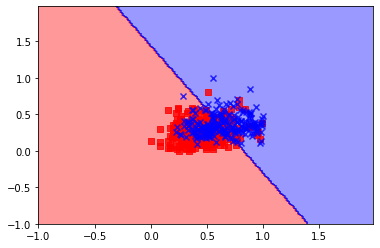

In [17]:
plot_decision_regions(train_x,train_y, SVM)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


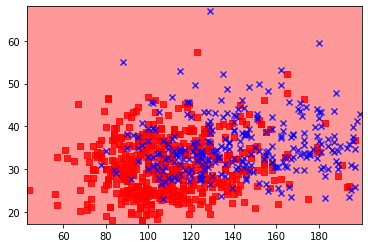

In [18]:
#plot_decision_regions(np.array(X), np.array(y), SVM)
#plt.show()

In [19]:
accuracy_score(test_y, y_pred)

0.7922077922077922

In [20]:
Pregnancies = input('懷孕幾個月: ')
print('血糖: Default( 110.8945 )')
BloodPressure = input('血壓: ')
print('皮膚厚度: Default( 20.5365 )')
print('胰島素: Default( 79.7995 )')
BMI = input('BMI: ')
print('糖尿病風險值: Default( 0.4719 )')
Age = input('年齡')

Custom = pd.Series([120.8945, BMI])
Cus_df = pd.DataFrame([list(Custom)],
        columns=['Glucose', 'BMI'])
Cus_df


懷孕幾個月: 6
血糖: Default( 120.8945 )
血壓: 89
皮膚厚度: Default( 20.5365 )
胰島素: Default( 79.7995 )
BMI: 29
糖尿病風險值: Default( 0.4719 )
年齡20


,Glucose,BMI
0,120.8945,29


In [21]:
Cus_df = scaler.transform(Cus_df) #Normalization
Cus_df

array([[0.49931494, 0.2208589 ]])

In [22]:
all_probability = SVM.decision_function(Cus_df)
p = -all_probability[0]
print('Probability: ',p)
if(p<0.5): print('Outcome: ', 0)
else: print('Outcome: ', 1)

Probability:  0.7971657734949811
Outcome:  1


# Storage and read model

In [23]:
from sklearn.externals import joblib 

#Storage Model
joblib.dump(SVM, 'svm_linear.pkl')

#Read Model
SVM = joblib.load('svm_linear.pkl')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
